In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
%matplotlib inline

In [2]:
dir_path = Path("../MatrixFlow用データセット/タイタニック/")

In [3]:
train_df = pd.read_csv(dir_path /"train.csv")

In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
total = len(train_df.index)
total

891

In [7]:
len(train_df["Ticket"].value_counts())

681

In [8]:
len(train_df["PassengerId"].value_counts())

891

In [9]:
train_df["Sex"].value_counts().to_dict()

{'male': 577, 'female': 314}

In [10]:
train_df.columns.tolist()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

PassengerId
PassengerId is unique.
Survived


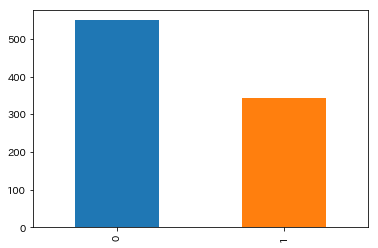

Pclass


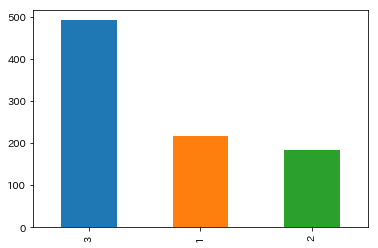

Name
Name is unique.
Sex


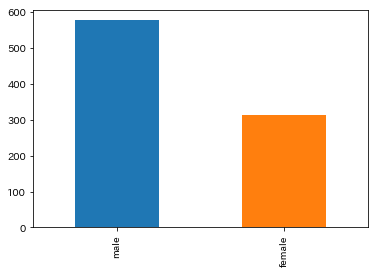

Age


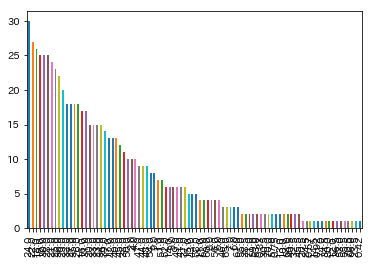

SibSp


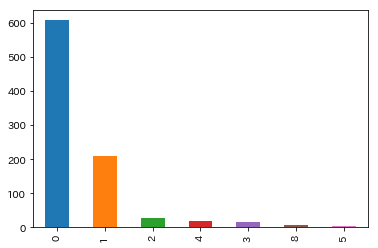

Parch


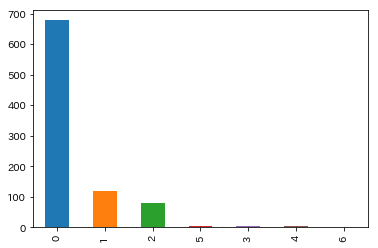

Ticket


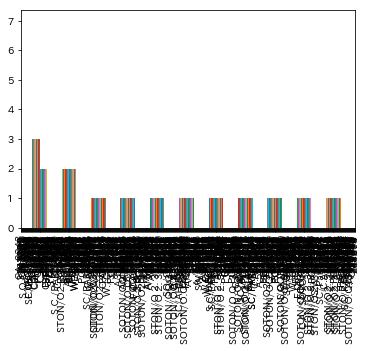

Fare


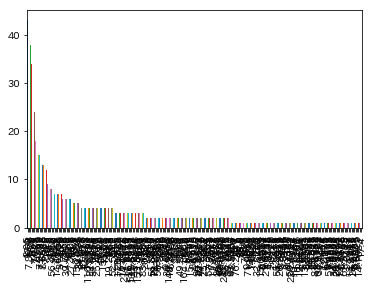

Cabin


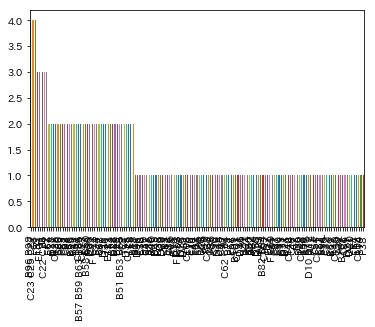

Embarked


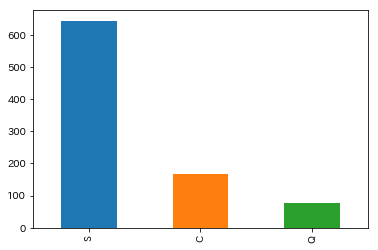

In [11]:
for f in train_df.columns.tolist():
    count = train_df[f].value_counts()
    print(f)
    if not len(count) == total:
        count.plot(kind='bar')
        plt.show()
    else:
        print("{} is unique.".format(f))

In [12]:
df= train_df.replace("male",0).replace("female",1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [13]:
#df["Age"].fillna(df.Age.median(), inplace=True)

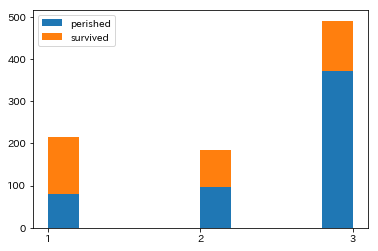

In [14]:
split_data = []
for survived in [0,1]:
    split_data.append(df[df.Survived==survived])

temp = [i["Pclass"].dropna() for i in split_data]
plt.hist(temp, histtype="barstacked")
plt.legend(["perished", "survived"])
plt.xticks([1,2,3])
plt.show()

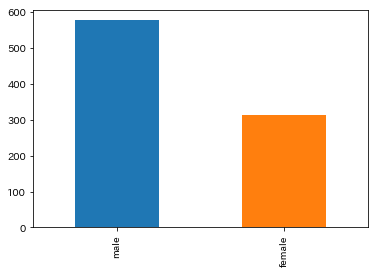

In [15]:
df["Sex"].value_counts().plot(kind='bar')
plt.xticks([0, 1], ['male', 'female'])
plt.show()

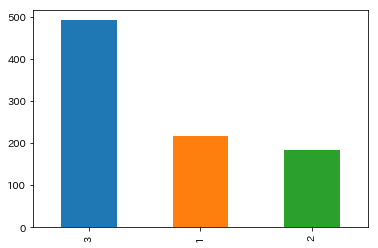

In [16]:
df["Pclass"].value_counts().plot(kind='bar')
#plt.xticks([0, 1], ['male', 'female'])
plt.show()

In [17]:
df["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

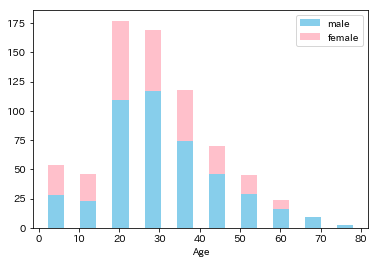

In [18]:
splitAsSex = [] 

for i in [0, 1]: # 0:male, 1:female
    splitAsSex.append(df[df.Sex == i])

tmp = [i["Age"].dropna() for i in splitAsSex]

plt.xlabel("Age")
plt.hist(tmp, histtype="barstacked", bins=10, rwidth=0.5, color=['skyblue','pink'], label=['male','female'])
plt.legend() 
plt.show()

In [19]:
df["FamilySize"] = df["SibSp"] + df["Parch"] + 1
df2 = df.drop(["Name", "SibSp", "Parch", "Ticket", "Fare", "Cabin", "Embarked"], axis=1)
df2.head()

,PassengerId,Survived,Pclass,Sex,Age,FamilySize
0,1,0,3,0,22.0,2
1,2,1,1,1,38.0,2
2,3,1,3,1,26.0,1
3,4,1,1,1,35.0,2
4,5,0,3,0,35.0,1


In [20]:
df2["Age"].fillna(df.Age.median(), inplace=True)

In [21]:
train_data = df2.values
xs = train_data[:, 2:]  #remove PassengerId and Surviced
y  = train_data[:, 1]    # Surviced

### RandomForest + GridSearchCV

In [22]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 100)

In [23]:
forest = forest.fit(xs, y)

In [24]:
from sklearn.model_selection import GridSearchCV
tuned_parameters = [
    {
        "n_estimators": [10, 20, 30, 40, 50, 70, 90, 110, 130, 150]
    }
]

clf = GridSearchCV(RandomForestClassifier(), tuned_parameters, cv=5, scoring='accuracy', n_jobs=1,verbose=1)

In [25]:
clf.fit(xs, y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    4.3s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=1,
       param_grid=[{'n_estimators': [10, 20, 30, 40, 50, 70, 90, 110, 130, 150]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

In [26]:
print(clf.best_score_)  
print(clf.best_params_)  

0.8148148148148148
{'n_estimators': 50}


### RandomForest or SVC + optuna

In [27]:
from functools import partial

import optuna
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn import datasets

In [30]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF, ConstantKernel, RationalQuadratic, ExpSineSquared

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier 

names = [
    "Nearest Neighbors", 
    "SVM", 
    "Gaussian Process",
    "Decision Tree", 
    "Random Forest", 
    "Neural Net", 
    "AdaBoost",
    "Naive Bayes", 
    "SGD",
    "QDA"]

classifiers = [
    KNeighborsClassifier,
    SVC,
    GaussianProcessClassifier,
    DecisionTreeClassifier,
    RandomForestClassifier,
    MLPClassifier,
    AdaBoostClassifier,
    GaussianNB,
    SGDClassifier,
    QuadraticDiscriminantAnalysis]


In [91]:
def objective(X, y, trial):
    classifier = trial.suggest_categorical('classifier',["Nearest Neighbors"]) # ['SVM', "Random Forest", "Decision Tree", "AdaBoost"])

    if classifier == 'SVM':
        params = {
            'kernel': trial.suggest_categorical('kernel', ['rbf', 'sigmoid']),
            'C': trial.suggest_loguniform('C', 1e+0, 1e+2),
            'gamma': trial.suggest_loguniform('gamma', 1e-2, 1e+1)
        }
    elif classifier == "Nearest Neighbors":
        params = {
            "n_neighbors": int(trial.suggest_loguniform('n_neighbors_nn', 1e+0, 1e+2)),
            "algorithm" : trial.suggest_categorical("algorithm_nn", ["auto", "ball_tree", "kd_tree", "brute"]),
        }
    elif classifier == "Random Forest":
        params = {
            'n_estimators': int(trial.suggest_loguniform('n_estimators_rf', 1e+2, 1e+3)),
            'max_depth': int(trial.suggest_loguniform('max_depth_rf', 2, 32))
        }
    elif classifier == "Gaussian Process":
        ker_rbf = ConstantKernel(1.0, constant_value_bounds="fixed") * RBF(1.0, length_scale_bounds="fixed")
        ker_rq = ConstantKernel(1.0, constant_value_bounds="fixed") * RationalQuadratic(alpha=0.1, length_scale=1)
        ker_expsine = ConstantKernel(1.0, constant_value_bounds="fixed") * ExpSineSquared(1.0, 5.0, periodicity_bounds=(1e-2, 1e1))
        kernel_list = [ker_rbf , ker_rq, ker_expsine]
        params = {
            'kernel': trial.suggest_categorical('kernel',  kernel_list),
         }
    elif classifier == "Decision Tree":
         params = {
            'max_depth': int(trial.suggest_loguniform('max_depth_rf', 2, 32)),
            'criterion': trial.suggest_categorical('criterion', ['gini', 'entropy']),
            "splitter" :   trial.suggest_categorical("splitter", ["best", "random"])
        }
    elif classifier == "AdaBoost":
        dtc_params = {
            'max_depth': int(trial.suggest_loguniform('max_depth_rf', 2, 32)),
            'criterion': trial.suggest_categorical('criterion', ['gini', 'entropy']),
            "splitter" :   trial.suggest_categorical("splitter", ["best", "random"])
        }
        params = {
            "base_estimator": DecisionTreeClassifier(**dtc_params)
        }
        
    model = classifiers[names.index(classifier)](**params)
        
    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
    scores = cross_validate(model, X=X, y=y, cv=kf, n_jobs=-1)
    return 1.0 - scores['test_score'].mean()

In [92]:
f = partial(objective, xs, y)
study = optuna.create_study()
study.optimize(f, n_trials=100)

[I 2019-01-04 22:57:12,312] Finished a trial resulted in value: 0.22557561971879436. Current best value is 0.22557561971879436 with parameters: {'classifier': 'Nearest Neighbors', 'n_neighbors_nn': 5.165911081167316, 'algorithm_nn': 'ball_tree'}.
[I 2019-01-04 22:57:12,339] Finished a trial resulted in value: 0.25473888630595165. Current best value is 0.22557561971879436 with parameters: {'classifier': 'Nearest Neighbors', 'n_neighbors_nn': 5.165911081167316, 'algorithm_nn': 'ball_tree'}.
[I 2019-01-04 22:57:12,374] Finished a trial resulted in value: 0.2446140435430051. Current best value is 0.22557561971879436 with parameters: {'classifier': 'Nearest Neighbors', 'n_neighbors_nn': 5.165911081167316, 'algorithm_nn': 'ball_tree'}.
[I 2019-01-04 22:57:12,405] Finished a trial resulted in value: 0.2615184763955576. Current best value is 0.22557561971879436 with parameters: {'classifier': 'Nearest Neighbors', 'n_neighbors_nn': 5.165911081167316, 'algorithm_nn': 'ball_tree'}.
[I 2019-01-04 

[I 2019-01-04 22:57:13,774] Finished a trial resulted in value: 0.23231105753732462. Current best value is 0.22557561971879436 with parameters: {'classifier': 'Nearest Neighbors', 'n_neighbors_nn': 5.165911081167316, 'algorithm_nn': 'ball_tree'}.
[I 2019-01-04 22:57:13,815] Finished a trial resulted in value: 0.23115579297301525. Current best value is 0.22557561971879436 with parameters: {'classifier': 'Nearest Neighbors', 'n_neighbors_nn': 5.165911081167316, 'algorithm_nn': 'ball_tree'}.
[I 2019-01-04 22:57:13,851] Finished a trial resulted in value: 0.2480035194147644. Current best value is 0.22557561971879436 with parameters: {'classifier': 'Nearest Neighbors', 'n_neighbors_nn': 5.165911081167316, 'algorithm_nn': 'ball_tree'}.
[I 2019-01-04 22:57:13,893] Finished a trial resulted in value: 0.24684875134185658. Current best value is 0.22557561971879436 with parameters: {'classifier': 'Nearest Neighbors', 'n_neighbors_nn': 5.165911081167316, 'algorithm_nn': 'ball_tree'}.
[I 2019-01-04

[I 2019-01-04 22:57:15,506] Finished a trial resulted in value: 0.24237312960163304. Current best value is 0.22557561971879436 with parameters: {'classifier': 'Nearest Neighbors', 'n_neighbors_nn': 5.165911081167316, 'algorithm_nn': 'ball_tree'}.
[I 2019-01-04 22:57:15,552] Finished a trial resulted in value: 0.2480035194147644. Current best value is 0.22557561971879436 with parameters: {'classifier': 'Nearest Neighbors', 'n_neighbors_nn': 5.165911081167316, 'algorithm_nn': 'ball_tree'}.
[I 2019-01-04 22:57:15,597] Finished a trial resulted in value: 0.2378534265176767. Current best value is 0.22557561971879436 with parameters: {'classifier': 'Nearest Neighbors', 'n_neighbors_nn': 5.165911081167316, 'algorithm_nn': 'ball_tree'}.
[I 2019-01-04 22:57:15,661] Finished a trial resulted in value: 0.2559192591497159. Current best value is 0.22557561971879436 with parameters: {'classifier': 'Nearest Neighbors', 'n_neighbors_nn': 5.165911081167316, 'algorithm_nn': 'ball_tree'}.
[I 2019-01-04 2

[I 2019-01-04 22:57:17,216] Finished a trial resulted in value: 0.23678667927754826. Current best value is 0.2154440033945827 with parameters: {'classifier': 'Nearest Neighbors', 'n_neighbors_nn': 9.33706309608012, 'algorithm_nn': 'ball_tree'}.


In [93]:
print('params:', study.best_params)
print("best test accuracy: ", 1 - study.best_value)
print(study.best_trial)

params: {'classifier': 'Nearest Neighbors', 'n_neighbors_nn': 9.33706309608012, 'algorithm_nn': 'ball_tree'}
best test accuracy:  0.7845559966054173
FrozenTrial(trial_id=84, state=<TrialState.COMPLETE: 1>, value=0.2154440033945827, datetime_start=datetime.datetime(2019, 1, 4, 22, 57, 16, 373106), datetime_complete=datetime.datetime(2019, 1, 4, 22, 57, 16, 418509), params={'classifier': 'Nearest Neighbors', 'n_neighbors_nn': 9.33706309608012, 'algorithm_nn': 'ball_tree'}, user_attrs={}, system_attrs={}, intermediate_values={}, params_in_internal_repr={'classifier': 0, 'n_neighbors_nn': 9.33706309608012, 'algorithm_nn': 1})


## preparation for submitting to kaggle

In [ ]:
test_df= pd.read_csv(dir_path/"test.csv").replace("male",0).replace("female",1)

test_df["Age"].fillna(df.Age.median(), inplace=True)
test_df["FamilySize"] = test_df["SibSp"] + test_df["Parch"] + 1
test_df2 = test_df.drop(["Name", "SibSp", "Parch", "Ticket", "Fare", "Cabin", "Embarked"], axis=1)
test_df2.head()

In [ ]:
test_data = test_df2.values

In [ ]:
output = forest.predict(xs_test)

print(len(test_data[:,0]), len(output))
zip_data = zip(test_data[:,0].astype(int), output.astype(int))
predict_data = list(zip_data)

In [ ]:
import csv
with open("predict_result_data.csv", "w") as f:
    writer = csv.writer(f, lineterminator='\n')
    writer.writerow(["PassengerId", "Survived"])
    for pid, survived in zip(test_data[:,0].astype(int), output.astype(int)):
        writer.writerow([pid, survived])